# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3166.13,1.558306e+10,...,2.115244e+09,7.189709e+08,46587904.0,24.67,5.446205e+08,276631552.0,3245.00,1.558306e+10,Campylobacter jejuni,46379008.0
1,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,988.93,5.550060e+09,...,3.802116e+09,3.802116e+09,134742016.0,31.23,8.184218e+08,459071488.0,1236.72,5.550060e+09,Escherichia coli,88154112.0
2,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2388.76,1.005870e+10,...,2.534011e+09,9.588531e+08,174067712.0,34.07,9.945620e+08,660180992.0,2546.08,1.005870e+10,Listeria monocytogenes,39325696.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1517.54,6.843236e+09,...,5.624377e+09,2.788295e+09,251715584.0,38.29,1.335677e+09,870260736.0,1856.47,6.843236e+09,Salmonella enterica,77647872.0
4,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3158.43,1.560137e+10,...,2.290647e+09,7.244390e+08,46682112.0,21.59,5.444198e+08,276242432.0,3236.90,1.560137e+10,Campylobacter jejuni,46473216.0
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,991.97,5.480444e+09,...,3.771884e+09,3.771884e+09,134828032.0,30.81,8.194007e+08,459337728.0,1240.15,5.480444e+09,Escherichia coli,88145920.0
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2388.61,9.555489e+09,...,3.185816e+09,1.059996e+09,173850624.0,36.21,9.951846e+08,660570112.0,2542.55,9.555489e+09,Listeria monocytogenes,39022592.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,2,23,418622,165,4,4808805,2102.23,6.751625e+09,...,6.020960e+09,2.700640e+09,252108800.0,37.54,1.335370e+09,870191104.0,2447.55,6.751625e+09,Salmonella enterica,78258176.0
8,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3164.05,1.538114e+10,...,2.191090e+09,7.395000e+08,46538752.0,22.05,5.440676e+08,276090880.0,3243.35,1.538114e+10,Campylobacter jejuni,46329856.0
9,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,986.85,5.426352e+09,...,3.808711e+09,3.808711e+09,134664192.0,29.04,8.182333e+08,459100160.0,1245.16,5.426352e+09,Escherichia coli,88125440.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46587904.0,46379008.0
Escherichia coli,1,134742016.0,88154112.0
Listeria monocytogenes,1,174067712.0,39325696.0
Salmonella enterica,1,251715584.0,77647872.0
Campylobacter jejuni,2,46682112.0,46473216.0
Escherichia coli,2,134828032.0,88145920.0
Listeria monocytogenes,2,173850624.0,39022592.0
Salmonella enterica,2,252108800.0,78258176.0
Campylobacter jejuni,3,46538752.0,46329856.0


## 1.1. Add coverage information

In [88]:
read_stats_df = pd.read_csv('cases/full/reads-stats.tsv', sep='\t')

dataset_ref = index_info_df[index_info_df['Iteration'] == 1][['Name', 'Reference length']]

read_stats_df = read_stats_df.merge(dataset_ref, left_on='Dataset', right_on='Name')
read_stats_df['Coverage'] = read_stats_df['Number nucleotides'] / read_stats_df['Reference length']
read_stats_df = read_stats_df.groupby('Dataset').agg({'Coverage': ['mean', 'std']})
read_stats_df.columns = read_stats_df.columns.droplevel()
read_stats_df = read_stats_df.rename({'mean': 'Mean coverage/sample', 'std': 'Stddev coverage/sample'}, axis='columns')
read_stats_df = read_stats_df.reset_index()
read_stats_df

,Dataset,Mean coverage/sample,Stddev coverage/sample
0,0810PADBR-1,402.293924,146.821037
1,1203NYJAP-1 - Tuna Scrape Outbreak,57.930072,19.001234
2,1405WAEXK-1,65.893699,29.617546
3,1408MLGX6-3WGS,129.554157,61.682928


In [90]:
index_info_cov_df = index_info_df.merge(read_stats_df, left_on='Name', right_on='Dataset')
index_info_cov_df['Number features/sample (all)'] = index_info_cov_df['Number features (all)'] / \
                                                    index_info_cov_df['Number samples']
index_info_cov_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism),Dataset,Mean coverage/sample,Stddev coverage/sample,Number features/sample (all)
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3166.13,1.558306e+10,...,5.446205e+08,276631552.0,3245.00,1.558306e+10,Campylobacter jejuni,46379008.0,0810PADBR-1,402.293924,146.821037,2050.772727
1,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3158.43,1.560137e+10,...,5.444198e+08,276242432.0,3236.90,1.560137e+10,Campylobacter jejuni,46473216.0,0810PADBR-1,402.293924,146.821037,2050.772727
2,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3164.05,1.538114e+10,...,5.440676e+08,276090880.0,3243.35,1.538114e+10,Campylobacter jejuni,46329856.0,0810PADBR-1,402.293924,146.821037,2050.772727
3,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,988.93,5.550060e+09,...,8.184218e+08,459071488.0,1236.72,5.550060e+09,Escherichia coli,88154112.0,1405WAEXK-1,65.893699,29.617546,61201.777778
4,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,991.97,5.480444e+09,...,8.194007e+08,459337728.0,1240.15,5.480444e+09,Escherichia coli,88145920.0,1405WAEXK-1,65.893699,29.617546,61201.777778
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,986.85,5.426352e+09,...,8.182333e+08,459100160.0,1245.16,5.426352e+09,Escherichia coli,88125440.0,1405WAEXK-1,65.893699,29.617546,61201.777778
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2388.76,1.005870e+10,...,9.945620e+08,660180992.0,2546.08,1.005870e+10,Listeria monocytogenes,39325696.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
7,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2388.61,9.555489e+09,...,9.951846e+08,660570112.0,2542.55,9.555489e+09,Listeria monocytogenes,39022592.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
8,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,3,31,142442,170,4,2939733,2379.77,9.873580e+09,...,9.947177e+08,660459520.0,2534.86,9.873580e+09,Listeria monocytogenes,39579648.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
9,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1517.54,6.843236e+09,...,1.335677e+09,870260736.0,1856.47,6.843236e+09,Salmonella enterica,77647872.0,1203NYJAP-1 - Tuna Scrape Outbreak,57.930072,19.001234,18200.956522


## 1.2. Organism info

In [145]:
organism_info_df = index_info_cov_df.groupby('Organism').agg({'Number features (all)': 'first',
                                                              'Number features/sample (all)': 'first',
                                                              'Mean coverage/sample': 'first',
                                                              'Number samples': 'first',
                                                              'Reference length': 'first'})
organism_info_df

,Number features (all),Number features/sample (all),Mean coverage/sample,Number samples,Reference length
Organism,,,,,
Campylobacter jejuni,45117,2050.772727,402.293924,22,1634890
Escherichia coli,550816,61201.777778,65.893699,9,5412686
Listeria monocytogenes,142442,4594.903226,129.554157,31,2939733
Salmonella enterica,418622,18200.956522,57.930072,23,4808805


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [27]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [93]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_cov_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length',
                                                              'Mean coverage/sample',
                                                              'Number features (all)',
                                                              'Number features/sample (all)',
                                                              'Number features (no unknown)'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Mean coverage/sample,Number features (all),Number features/sample (all),Number features (no unknown),Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3166.13,52.768833,0.879481,143.915000,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3158.43,52.640500,0.877342,143.565000,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
2,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3164.05,52.734167,0.878903,143.820455,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
3,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,988.93,16.482167,0.274703,109.881111,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
4,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,991.97,16.532833,0.275547,110.218889,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,986.85,16.447500,0.274125,109.650000,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2388.76,39.812667,0.663544,77.056774,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2388.61,39.810167,0.663503,77.051935,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
8,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2379.77,39.662833,0.661047,76.766774,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
9,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,57.930072,418622,18200.956522,165,Analysis,1517.54,25.292333,0.421539,65.980000,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


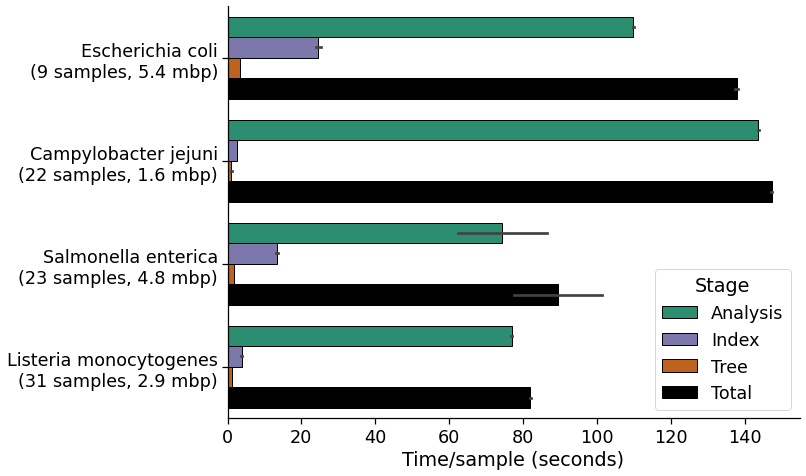

In [94]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Time/sample (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

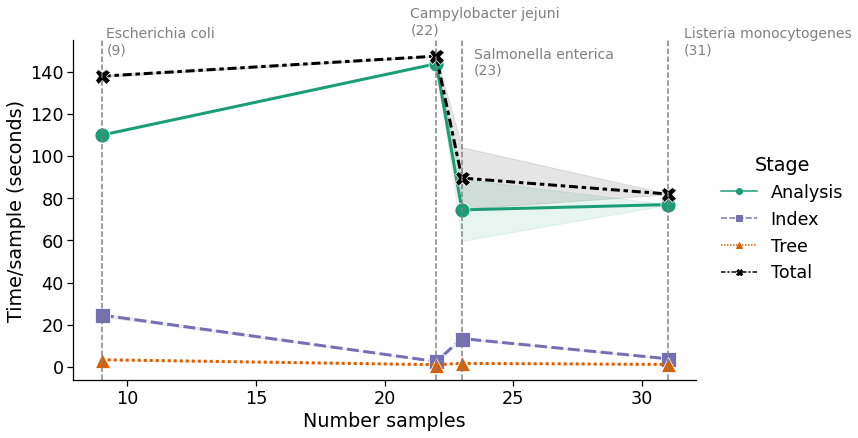

In [171]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Number samples', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Number samples']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - 1
            elif name == 'Salmonella enterica':
                ypos = ylim[1] - ylen * 0.1
                xpos = value + value * 0.02
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f})', fontdict={'size': 14, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

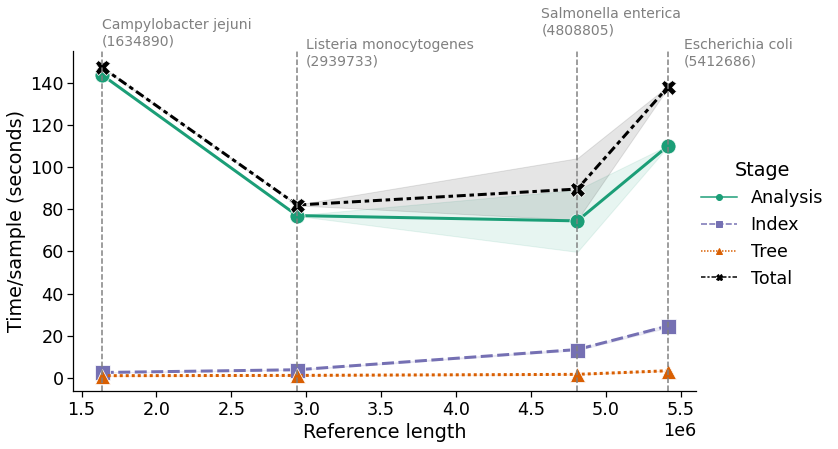

In [170]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Reference length', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Reference length']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - 1
            elif name == 'Salmonella enterica':
                ypos = ylim[1] + ylen * 0.05
                xpos = value - value * 0.05
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f})', fontdict={'size': 14, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

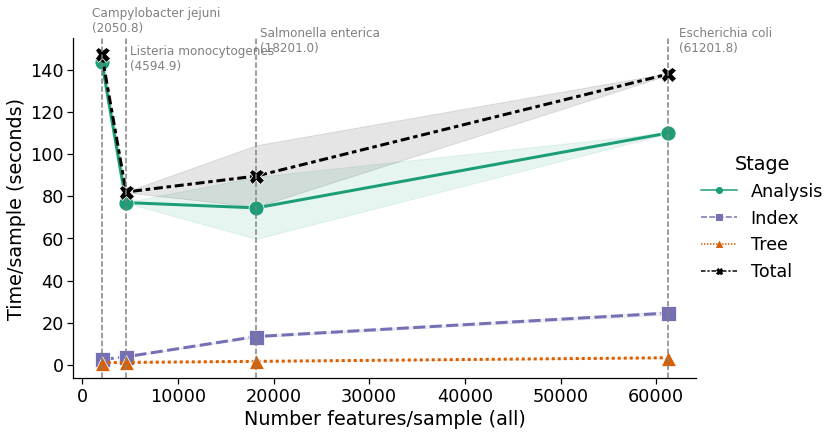

In [169]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Number features/sample (all)', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Number features/sample (all)']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - value * 0.5
            elif name == 'Listeria monocytogenes':
                ypos = ylim[1] - 15
                xpos = value + value * 0.1
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.1f})', fontdict={'size': 12, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

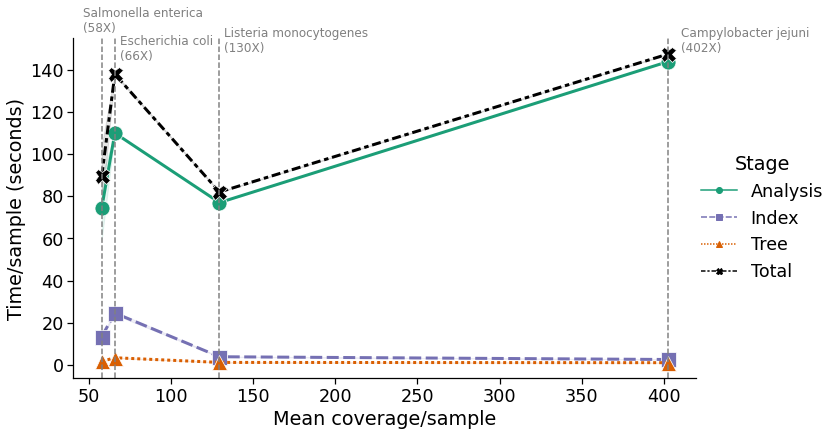

In [168]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Mean coverage/sample', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        for name, values in organism_info_df.iterrows():
            value = values.loc['Mean coverage/sample']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Salmonella enterica':
                ypos = ylim[1] + 3
                xpos = value - value * 0.2
            elif name == 'Escherichia coli':
                ypos = ylim[1] - 10
                xpos = value + value * 0.05
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f}X)', fontdict={'size': 12, 'color': 'gray'})

    # plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [141]:
index_info_runtime_df[['Label', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

Time/sample (seconds)  \
                                                                        mean   
Label                                         Stage                            
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis            143.766818   
                                              Index                 2.550455   
                                              Total               147.352273   
                                              Tree                  1.035000   
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis            109.916667   
                                              Index                24.562963   
                                              Total               137.852963   
                                              Tree                  3.373333   
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis             76.958495   
                                              Index                 3.850645   
                                              Total                81.973011   
                                              Tree                  1.163871   
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis             74.442174   
                                              Index                13.434058   
                                              Total                89.541014   
                                              Tree                  1.664783   

                                                                         
                                                              std count  
Label                                         Stage                      
Campylobacter jejuni\n(22 samples, 1.6 mbp)   Analysis   0.181060     3  
                                              Index      0.075656     3  
                                              Total      0.194567     3  
                                              Tree       0.075520     3  
Escherichia coli\n(9 samples, 5.4 mbp)        Analysis   0.286106     3  
                                              Index      0.790648     3  
                                              Total      0.471620     3  
                                              Tree       0.129142     3  
Listeria monocytogenes\n(31 samples, 2.9 mbp) Analysis   0.166052     3  
                                              Index      0.108824     3  
                                              Total      0.185068     3  
                                              Tree       0.062847     3  
Salmonella enterica\n(23 samples, 4.8 mbp)    Analysis  14.687048     3  
                                              Index      0.391543     3  
                                              Total     14.618634     3  
                                              Tree       0.032609     3

## 2.2. Memory plots

In [24]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (GB)'] = df['Peak Memory (GB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
             df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_cov_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

,Name,Organism,Number samples,Reference length,Stage,Peak Memory (GB),Peak Memory/sample (GB),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,14.512859,0.659675,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,14.529907,0.660450,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
2,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,14.324799,0.651127,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
3,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,5.168896,0.574322,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
4,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,5.104061,0.567118,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,5.053684,0.561520,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,9.367897,0.302190,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,8.899242,0.287072,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
8,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,9.195488,0.296629,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
9,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,6.373260,0.277098,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


In [ ]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Peak Memory (GB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [ ]:
index_info_memory_df[['Label', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

## 2.3. Disk usage plots

In [25]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_cov_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

,Name,Organism,Number samples,Reference length,Stage,Disk (MB),Disk/sample (MB),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11446.964844,520.316584,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11447.015625,520.318892,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
2,0810PADBR-1,Campylobacter jejuni,22,1634890,Analysis,11446.984375,520.317472,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
3,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6251.402344,694.600260,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
4,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6251.390625,694.598958,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,Analysis,6251.398438,694.599826,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,10306.500000,332.467742,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,10306.496094,332.467616,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
8,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,Analysis,10306.546875,332.469254,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
9,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,Analysis,8598.601562,373.852242,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


In [ ]:
with sns.plotting_context("notebook", font_scale=1.8):
    cat_order = index_info_disk_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [ ]:
index_info_disk_df[['Label', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])